In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import GaussianNB,MultinomialNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [2]:
data_love = pd.read_csv("love_df.csv")
data_fear = pd.read_csv("fear_df.csv")

# Create the label-to-name dictionary
label_to_name_dict = dict(zip(data_love['label'], data_love['label_name']))
print(label_to_name_dict)

data_love = data_love.drop('label_name', axis=1)
data_fear = data_fear.drop('label_name', axis=1)

data_fear

{4: 'fear', 0: 'sadness', 2: 'love', 1: 'joy', 5: 'surprise', 3: 'anger'}


,text,label
0,i wasn t feeling the least bit uncomfortable u...,4
1,i still feel intimidated by other photographer...,4
2,i did not feel its strange effects no more,4
3,i dont know about you but sometimes i feel int...,4
4,i feel nervous about going back to america not...,4
...,...,...
240369,i was fatigued but not much i was definitely m...,3
240370,i was planning on pulling over and having blai...,3
240371,i feel though that he might be too stubborn fo...,3
240372,im starting to feel a little stressed out most...,3


In [3]:
# Preprocessing
pattern = r'[^a-zA-Z0-9\s]'
stop_words = set(stopwords.words('english'))
def preprocess(text):
    clean_text = re.sub(pattern, '', text)  # replace with empty string
    tokens = word_tokenize(clean_text)  # tokenize the given clean text
    filtered_token = [word for word in tokens if word.lower() not in stop_words]  # remove stop words
    return ' '.join(filtered_token)

## Love
Cut all the numbers of the other categories down to the number of ⁠love category⁠

In [4]:
# Assuming preprocess function is already defined
data_love['text'] = data_love['text'].apply(preprocess)

# Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
tfidf.fit(data_love['text'])
trf = tfidf.transform(data_love['text'])
trf = trf.toarray()
X = trf
y = data_love['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training and evaluation for Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_preds = mnb.predict(X_test)
print('Multinomial Naive Bayes Accuracy:', accuracy_score(y_test, y_preds))

# Compute confusion matrix for Multinomial Naive Bayes
cm_mnb = confusion_matrix(y_test, y_preds)
disp_mnb = ConfusionMatrixDisplay(confusion_matrix=cm_mnb, display_labels=[label_to_name_dict[label] for label in mnb.classes_])
disp_mnb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

# Display the classification report for Logistic Regression
report_mnb = classification_report(y_test, y_preds, target_names=[label_to_name_dict[label] for label in mnb.classes_])
print('Classification Report - Multinomial Naive Bayes:')
print(report_mnb)

In [5]:
# Model training and evaluation for XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_preds_xgb = xgb.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_preds_xgb))

# Compute confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_preds_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[label_to_name_dict[label] for label in xgb.classes_])
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Display the classification report for Logistic Regression
report_xgb = classification_report(y_test, y_preds_xgb, target_names=[label_to_name_dict[label] for label in xgb.classes_])
print('Classification Report - XGBoost:')
print(report_xgb)

In [6]:
# Model training and evaluation for Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_preds_logreg = logreg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_preds_logreg))

# Compute confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_preds_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=[label_to_name_dict[label] for label in logreg.classes_])
disp_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Display the classification report for Logistic Regression
report_logreg = classification_report(y_test, y_preds_logreg, target_names=[label_to_name_dict[label] for label in logreg.classes_])
print('Classification Report - Logistic Regression:')
print(report_logreg)

## Fear
Cut all the numbers of the other categories down to the number of ⁠fear category⁠

Accuracy: 0.8728445137805512


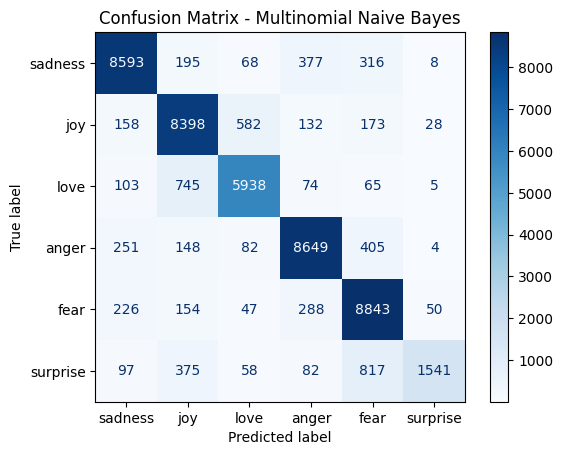

Classification Report - Multinomial Naive Bayes:
              precision    recall  f1-score   support

     sadness       0.91      0.90      0.91      9557
         joy       0.84      0.89      0.86      9471
        love       0.88      0.86      0.87      6930
       anger       0.90      0.91      0.90      9539
        fear       0.83      0.92      0.87      9608
    surprise       0.94      0.52      0.67      2970

    accuracy                           0.87     48075
   macro avg       0.88      0.83      0.85     48075
weighted avg       0.88      0.87      0.87     48075

Average Weighted F1-score: 0.87008


In [7]:
data_fear['text'] = data_fear['text'].apply(preprocess)

# Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
tfidf.fit(data_fear['text'])
trf = tfidf.transform(data_fear['text'])
trf = trf.toarray()
X = trf
y = data_fear['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training and evaluation
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_preds = mnb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_preds))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_to_name_dict[label] for label in mnb.classes_])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

# Display the classification report for Logistic Regression
report_mnb = classification_report(y_test, y_preds, target_names=[label_to_name_dict[label] for label in mnb.classes_])
print('Classification Report - Multinomial Naive Bayes:')
print(report_mnb)

# Calculate average weighted F1-score
weighted_f1_score = f1_score(y_test, y_preds, average='weighted')
print(f'Average Weighted F1-score: {weighted_f1_score:.5f}')

XGBoost Accuracy: 0.8990743629745189


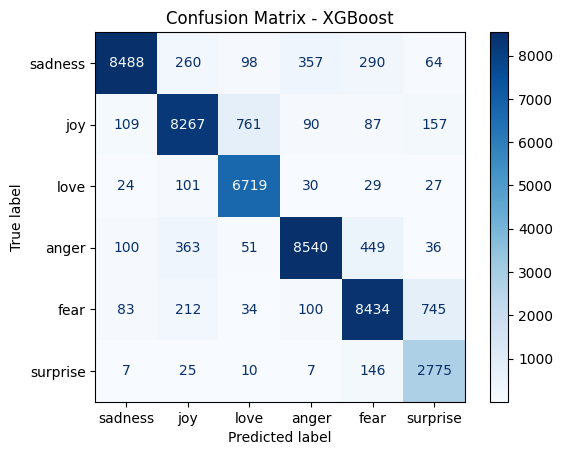

Classification Report - XGBoost:
              precision    recall  f1-score   support

     sadness       0.96      0.89      0.92      9557
         joy       0.90      0.87      0.88      9471
        love       0.88      0.97      0.92      6930
       anger       0.94      0.90      0.92      9539
        fear       0.89      0.88      0.89      9608
    surprise       0.73      0.93      0.82      2970

    accuracy                           0.90     48075
   macro avg       0.88      0.91      0.89     48075
weighted avg       0.90      0.90      0.90     48075

Average Weighted F1-score: 0.89981


In [8]:
# Model training and evaluation for XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_preds_xgb = xgb.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_preds_xgb))

# Compute confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_preds_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[label_to_name_dict[label] for label in xgb.classes_])
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Display the classification report for Logistic Regression
report_xgb = classification_report(y_test, y_preds_xgb, target_names=[label_to_name_dict[label] for label in xgb.classes_])
print('Classification Report - XGBoost:')
print(report_xgb)

# Calculate average weighted F1-score
weighted_f1_score = f1_score(y_test, y_preds_xgb, average='weighted')
print(f'Average Weighted F1-score: {weighted_f1_score:.5f}')

Logistic Regression Accuracy: 0.9001560062402496


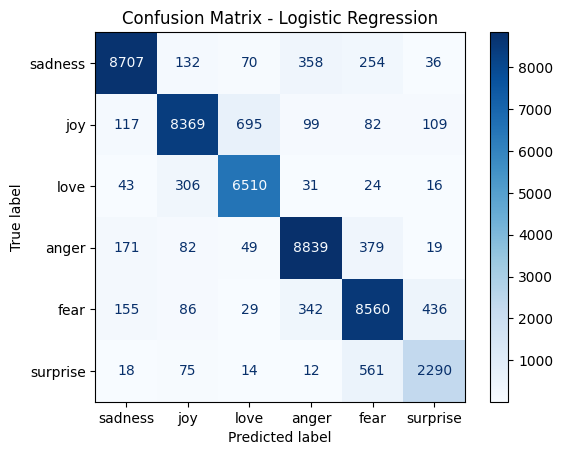

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

     sadness       0.95      0.91      0.93      9557
         joy       0.92      0.88      0.90      9471
        love       0.88      0.94      0.91      6930
       anger       0.91      0.93      0.92      9539
        fear       0.87      0.89      0.88      9608
    surprise       0.79      0.77      0.78      2970

    accuracy                           0.90     48075
   macro avg       0.89      0.89      0.89     48075
weighted avg       0.90      0.90      0.90     48075

Average Weighted F1-score: 0.90017


In [9]:
# Model training and evaluation for Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_preds_logreg = logreg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_preds_logreg))

# Compute confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_preds_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=[label_to_name_dict[label] for label in logreg.classes_])
disp_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Display the classification report for Logistic Regression
report_logreg = classification_report(y_test, y_preds_logreg, target_names=[label_to_name_dict[label] for label in logreg.classes_])
print('Classification Report - Logistic Regression:')
print(report_logreg)

# Calculate average weighted F1-score
weighted_f1_score = f1_score(y_test, y_preds_logreg, average='weighted')
print(f'Average Weighted F1-score: {weighted_f1_score:.5f}')